In [ ]:
#GoogleDrive
from google.colab import drive
drive.mount('/content/drive')
!git clone 'https://github.com/ShiwaniArdhya/Rop_Optimization.git' '/content/drive/MyDrive/rop'
import os
os.chdir('/content/drive/MyDrive/rop')

In [ ]:
#import Libraries
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error #MSE
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_rop = pd.read_csv('/content/drive/MyDrive/rop/qcrop.csv')
train_rop.interpolate()
train_rop=train_rop.fillna(method='ffill')

In [ ]:
#Pearson Correlation
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_rop.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('Pearson.png', dpi=300,bbox_inches='tight')

In [ ]:
train_rop=train_rop.drop(['Formation pressure gradient','FV'],axis=1)


In [ ]:
train_rop.describe()

In [ ]:
train_2=train_rop.copy(deep=True) 
numerical_features=train_rop.columns
from scipy.signal import savgol_filter
filter_features=['ROP', 'Depth', 'WOB', 'SPP',  'MW', 'Temperature', 'Q',
        'ECD', 'Porosity' ]
for i in filter_features:
    train_2[i]=savgol_filter(train_2[i],11,3)
cols=train_2.columns
train_2_stand=train_2
min_max_scaler = MinMaxScaler()
train_2_stand = min_max_scaler.fit_transform(train_2_stand)
train_2_stand=pd.DataFrame(columns=cols,data=train_2_stand)
y = train_2_stand['ROP']   
X = train_2_stand.drop(["ROP"], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [ ]:
fig1=plt.figure(figsize=(4,16),dpi=300)
plt.plot(train_rop['ROP'],train_rop['Depth'],label='Measured ROP')
plt.plot(train_2['ROP'],train_2['Depth'],color='r',label='Denoised ROP')
ax = plt.gca()  
ax.invert_yaxis()
plt.xlabel('ROP(m/h)')
plt.ylabel('Depth(m)')
plt.legend()
plt.savefig('ROP.png', dpi=300,bbox_inches='tight')

In [ ]:
fig1=plt.figure(figsize=(4,16),dpi=300)
plt.plot(train_rop['WOB'],train_rop['Depth'],label='Measured WOB')
plt.plot(train_2['WOB'],train_2['Depth'],color='r',label='Denoised WOB')
ax = plt.gca()  
ax.invert_yaxis()
plt.xlabel('WOB(kN)')
plt.ylabel('Depth(m)')
plt.legend()
plt.savefig('WOB.png', dpi=300,bbox_inches='tight')

In [ ]:
fig1=plt.figure(figsize=(4,16),dpi=300)
plt.plot(train_rop['SPP'],train_rop['Depth'],label='Measured SPP')
plt.plot(train_2['SPP'],train_2['Depth'],color='r',label='Denoised SPP')
ax = plt.gca()  
ax.invert_yaxis()
plt.xlabel('SPP(MPa)')
plt.ylabel('Depth(m)')
plt.legend()
plt.savefig('SPP.png', dpi=300,bbox_inches='tight')

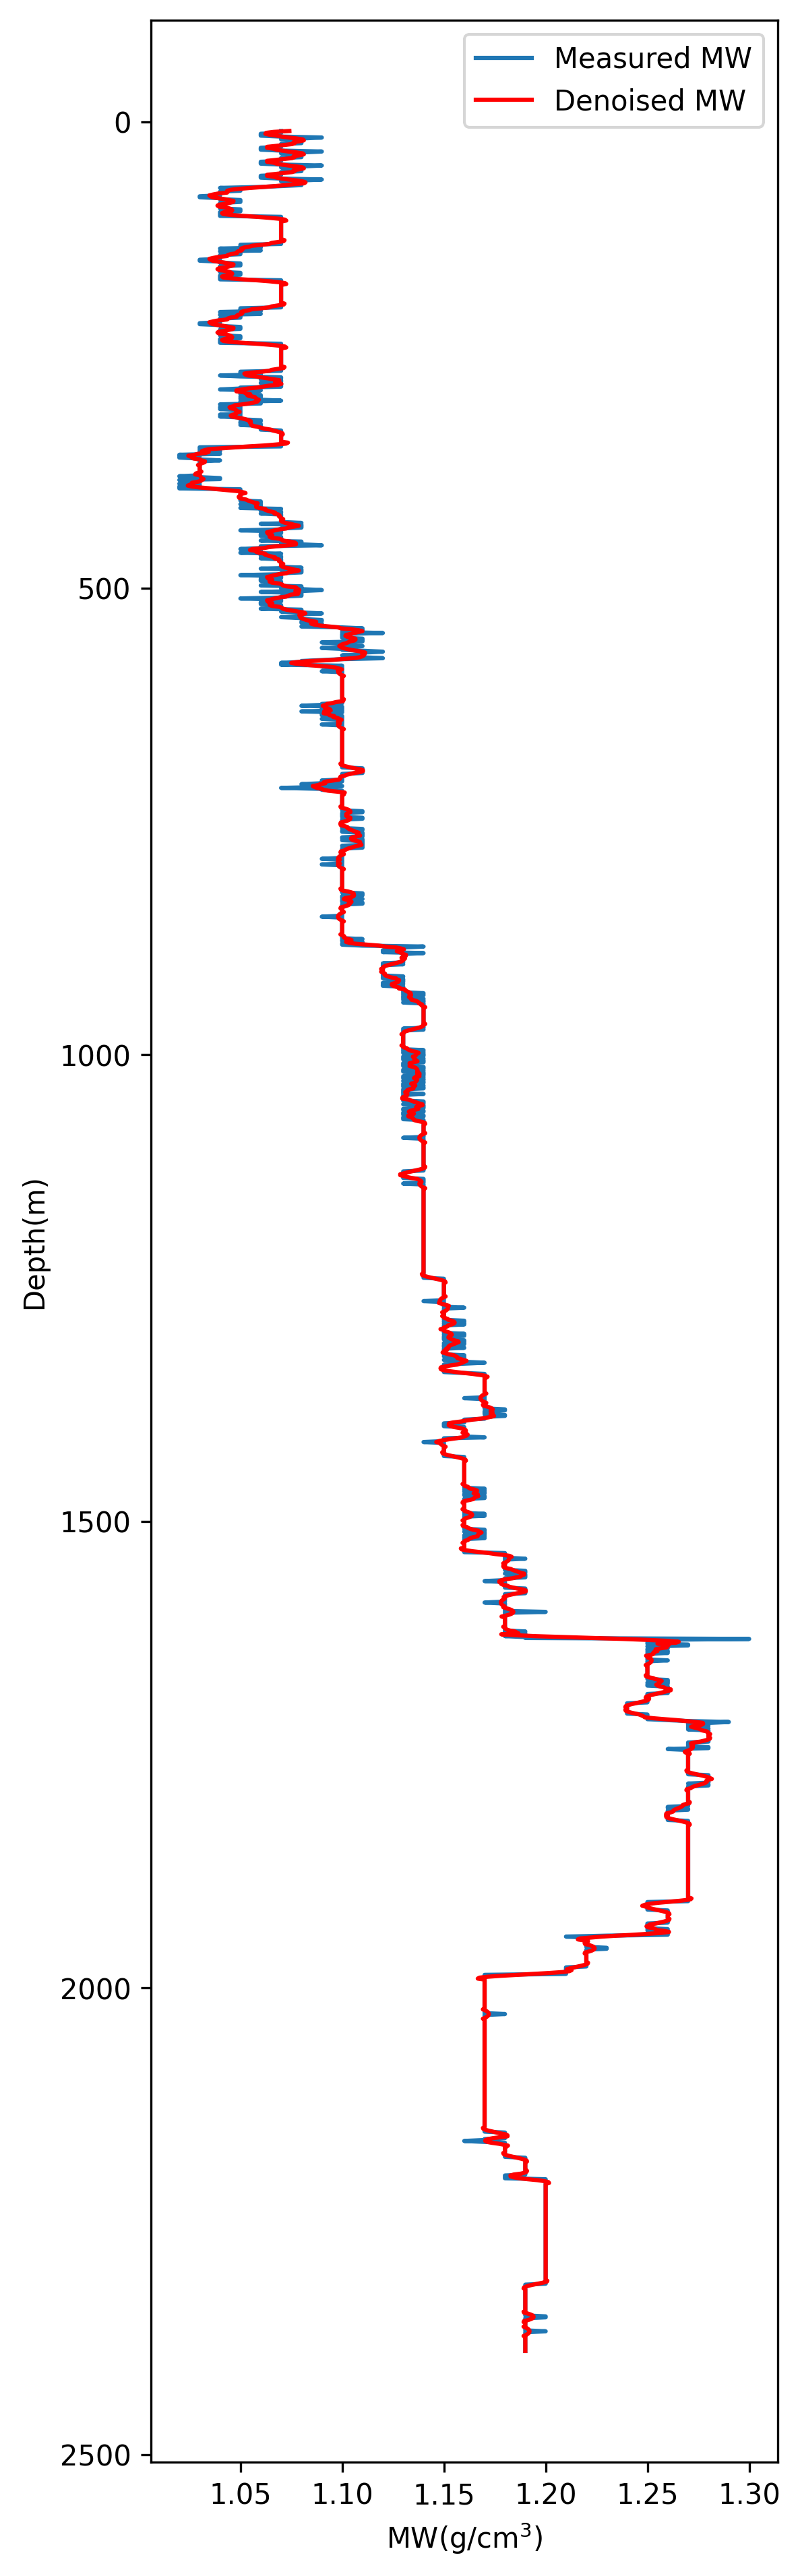

In [ ]:
fig1=plt.figure(figsize=(4,16),dpi=300)
plt.plot(train_rop['MW'],train_rop['Depth'],label='Measured MW')
plt.plot(train_2['MW'],train_2['Depth'],color='r',label='Denoised MW')
ax = plt.gca()  
ax.invert_yaxis()
plt.xlabel('MW(g/cm$^3$)')
plt.ylabel('Depth(m)')
plt.legend()
plt.savefig('MW.png', dpi=300,bbox_inches='tight')

In [ ]:
fig1=plt.figure(figsize=(4,16),dpi=300)
plt.plot(train_rop['Temperature'],train_rop['Depth'],label='Measured Temperature')
plt.plot(train_2['Temperature'],train_2['Depth'],color='r',label='Denoised Temperature')
ax = plt.gca()  
ax.invert_yaxis()
plt.xlabel('Temperature(°C)')
plt.ylabel('Depth(m)')
plt.legend()
plt.savefig('Temperature.png', dpi=300,bbox_inches='tight')

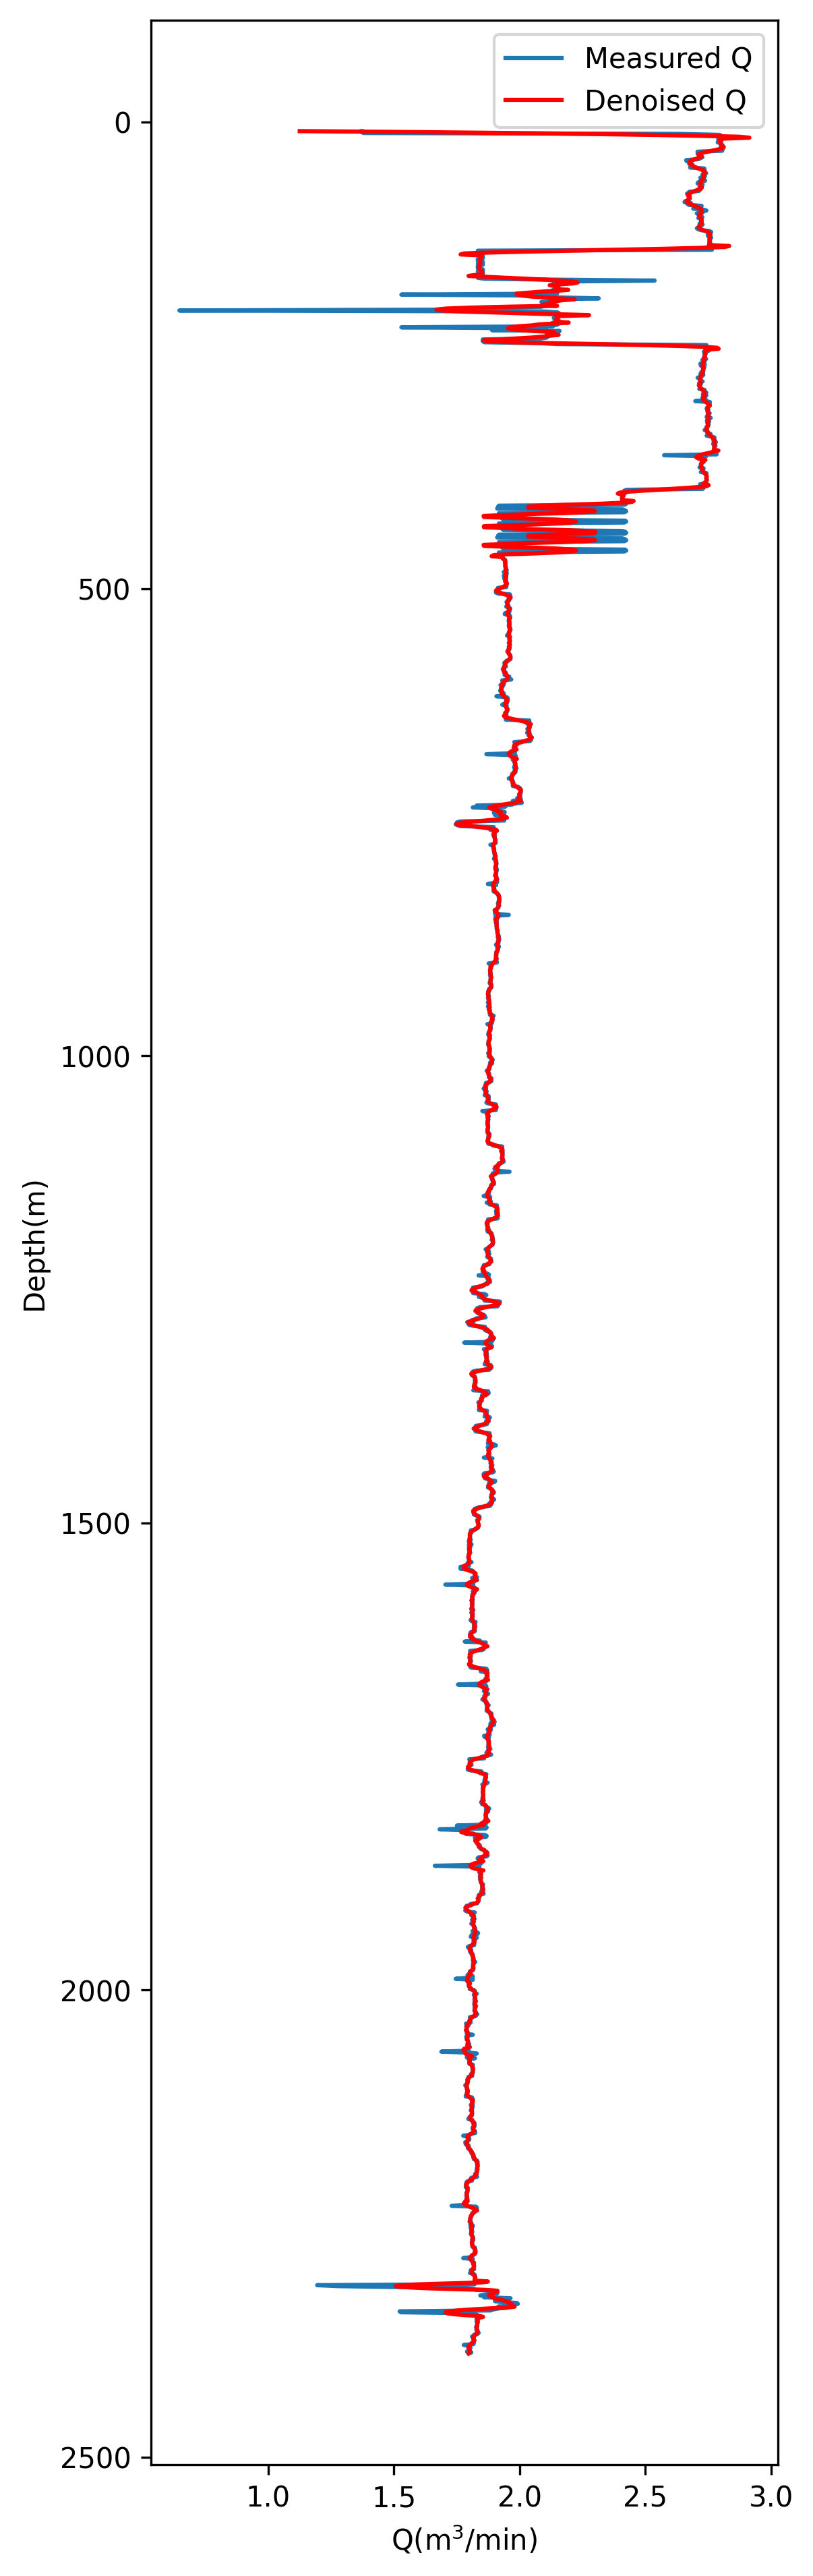

In [ ]:
fig1=plt.figure(figsize=(4,16),dpi=300)
plt.plot(train_rop['Q'],train_rop['Depth'],label='Measured Q')
plt.plot(train_2['Q'],train_2['Depth'],color='r',label='Denoised Q')
ax = plt.gca()  
ax.invert_yaxis()
plt.xlabel('Q(m$^3$/min)')
plt.ylabel('Depth(m)')
plt.legend()
plt.savefig('Q.png', dpi=300,bbox_inches='tight')

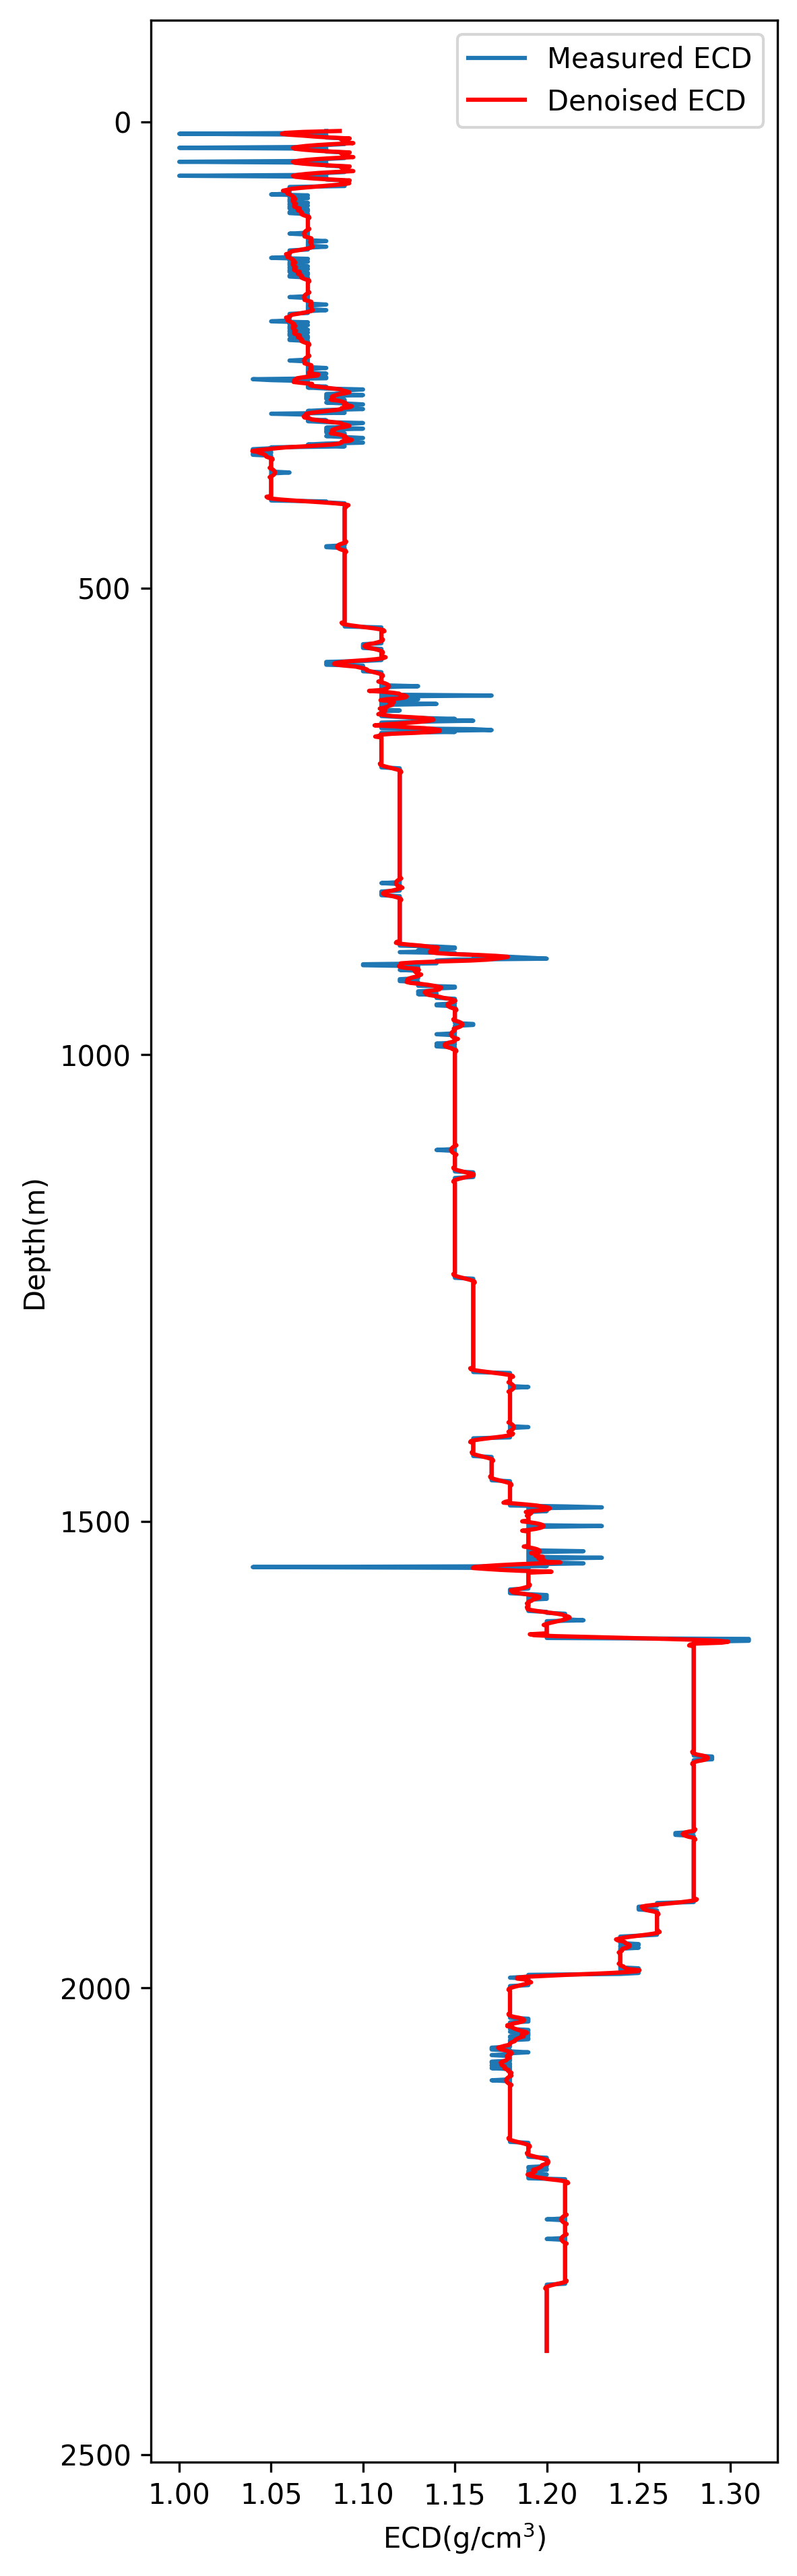

In [ ]:
fig1=plt.figure(figsize=(4,16),dpi=300)
plt.plot(train_rop['ECD'],train_rop['Depth'],label='Measured ECD')
plt.plot(train_2['ECD'],train_2['Depth'],color='r',label='Denoised ECD')
ax = plt.gca()  
ax.invert_yaxis()
plt.xlabel('ECD(g/cm$^3$)')
plt.ylabel('Depth(m)')
plt.legend()
plt.savefig('ECD.png', dpi=300,bbox_inches='tight')

In [ ]:
fig1=plt.figure(figsize=(4,16),dpi=300)
plt.plot(train_rop['Porosity'],train_rop['Depth'],label='Measured Porosity')
plt.plot(train_2['Porosity'],train_2['Depth'],color='r',label='Denoised Porosity')
ax = plt.gca()  
ax.invert_yaxis()
plt.xlabel('Porosity')
plt.ylabel('Depth(m)')
plt.legend()
plt.savefig('Porosity.png', dpi=300,bbox_inches='tight')

In [ ]:
#ET
from sklearn.metrics import mean_squared_error#MSE
from sklearn.ensemble import ExtraTreesRegressor
# for i in [10,100,200,300]:
ET =   ExtraTreesRegressor(n_estimators=300,random_state=42,max_depth=18,min_samples_split=2)
ET.fit(X_train, y_train)    
y_test_pred_ET = ET.predict(X_test)
y_train_pred_ET = ET.predict(X_train)
print ('The r2 score of ET on test is', r2_score(y_test, y_test_pred_ET))
print ('The r2 score of ET on train is', r2_score(y_train, y_train_pred_ET))

In [ ]:
y_minmax=MinMaxScaler().fit(train_2['ROP'].values.reshape(-1,1))
y_test_i=y_minmax.inverse_transform(y_test.values.reshape(-1,1))
y_test_max=y_test_i.max()
y_train_i=y_minmax.inverse_transform(y_train.values.reshape(-1,1))
y_train_pred_ET_i=y_minmax.inverse_transform(y_train_pred_ET.reshape(-1,1))

In [ ]:
y_train_pred_ET_i=y_minmax.inverse_transform(y_train_pred_ET.reshape(-1,1))
y_test_pred_ET_i=y_minmax.inverse_transform(y_test_pred_ET.reshape(-1,1))
print('The RMSE of ET on train is',mean_squared_error(y_train_i, y_train_pred_ET_i)**0.5)
print('The RMSE of ET on test is',mean_squared_error(y_test_i, y_test_pred_ET_i)**0.5)

In [ ]:
y_test_pred_ET_i=y_minmax.inverse_transform(y_test_pred_ET.reshape(-1,1))
fig2=plt.figure(figsize=(5,5),dpi=300)
plt.scatter(y_train_i,y_train_pred_ET_i,label='Training')
plt.scatter(y_test_i,y_test_pred_ET_i,label='Testing',color='red')

plt.plot( (0,y_test_max), (0,y_test_max),color = 'blue',  linestyle="--" )
plt.xlabel('Denosied ROP(m/h)')
plt.ylabel('Predicted ROP(m/h)')

plt.text(7.5,19,'Testing  dataset R$^2$=%.4f'%r2_score(y_test, y_test_pred_ET))
plt.text(7.5,20,'Training dataset R$^2$=%.4f'%r2_score(y_train, y_train_pred_ET))
plt.legend()
plt.savefig('et.png', dpi=300,bbox_inches='tight')

In [ ]:
#SVR
from sklearn.svm import SVR
SVR = SVR(kernel = 'rbf',C=1000,gamma=1)
SVR.fit(X_train, y_train)

y_test_pred_SVR = SVR.predict(X_test)
y_train_pred_SVR = SVR.predict(X_train)

print ('The r2_score of SVR on test is', r2_score(y_test, y_test_pred_SVR))
print ('The r2_score of SVR on train is', r2_score(y_train, y_train_pred_SVR))

The r2_score of SVR on test is 0.5572255804785162
The r2_score of SVR on train is 0.6072305468968318


In [ ]:
y_minmax=MinMaxScaler().fit(train_2['ROP'].values.reshape(-1,1))
y_train_pred_SVR_i=y_minmax.inverse_transform(y_train_pred_SVR.reshape(-1,1))
y_test_pred_SVR_i=y_minmax.inverse_transform(y_test_pred_SVR.reshape(-1,1))
print('The RMSE of lg on train is',mean_squared_error(y_train_i, y_train_pred_SVR_i)**0.5)
print('The RMSE of lg on test is',mean_squared_error(y_test_i, y_test_pred_SVR_i)**0.5)

The RMSE of lg on train is 1.302713784684961
The RMSE of lg on test is 1.5543208720873445


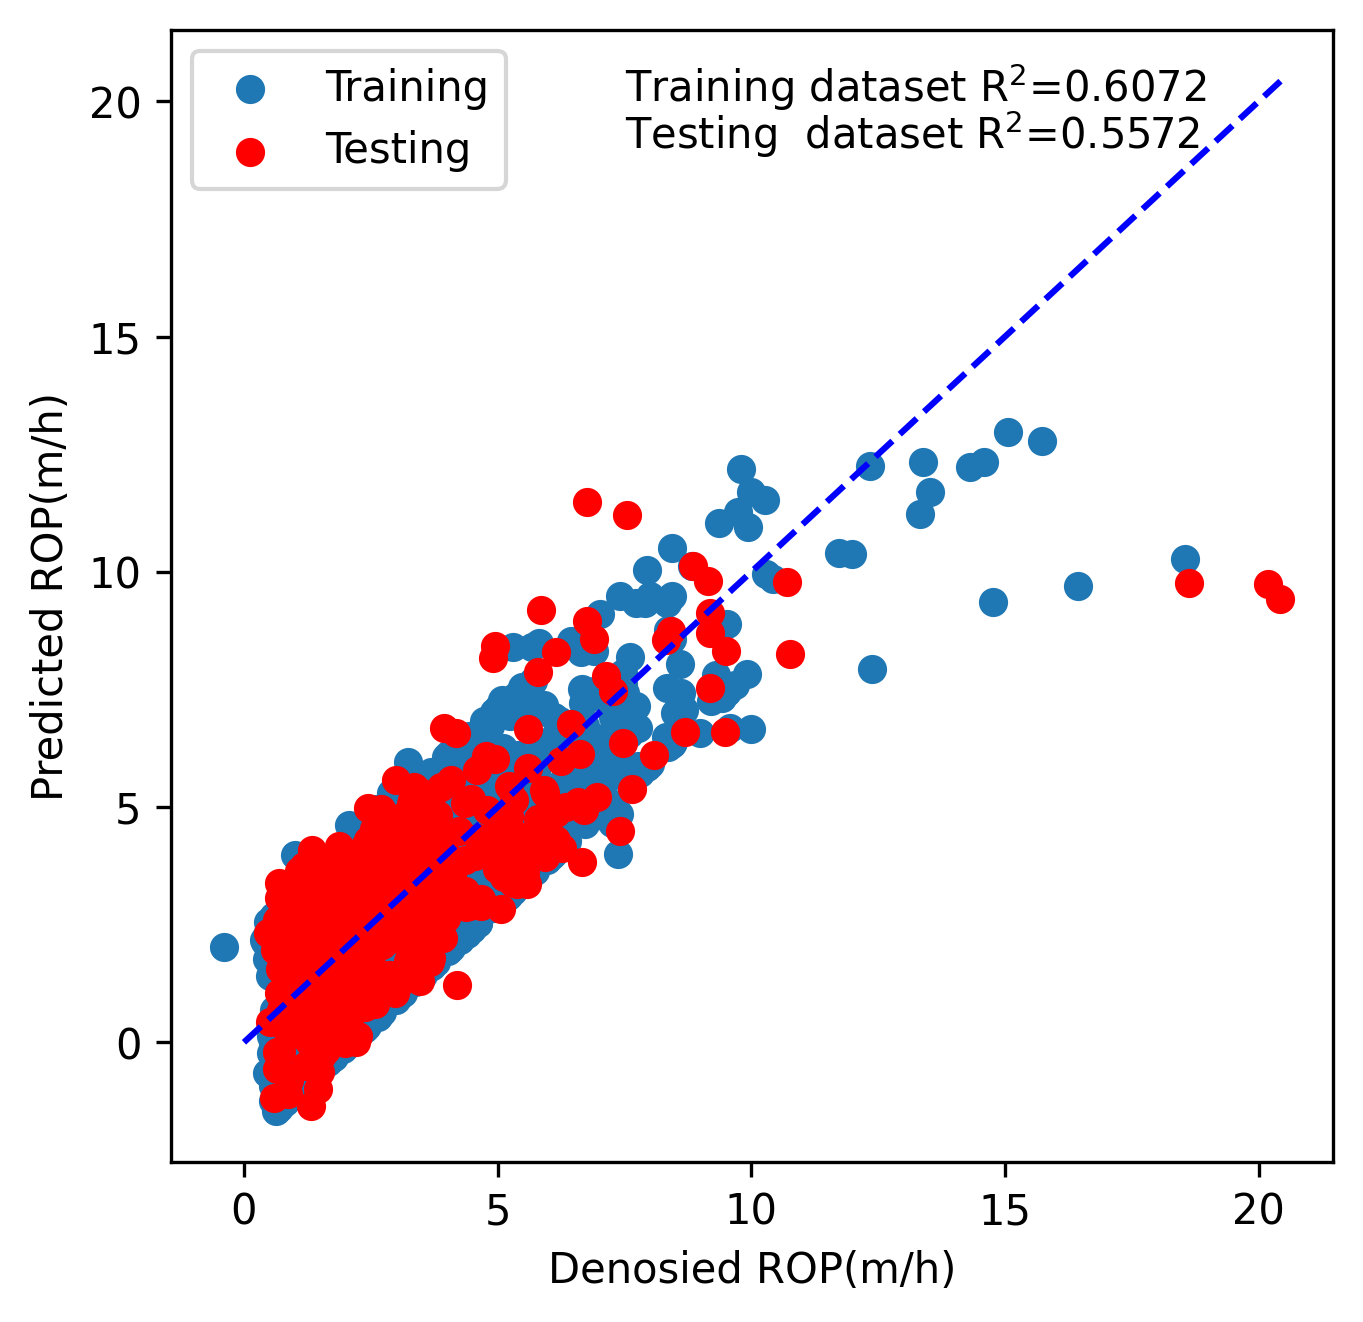

In [ ]:
y_test_pred_SVR_i=y_minmax.inverse_transform(y_test_pred_SVR.reshape(-1,1))
fig2=plt.figure(figsize=(5,5),dpi=300)
plt.scatter(y_train_i,y_train_pred_SVR_i,label='Training')
plt.scatter(y_test_i,y_test_pred_SVR_i,label='Testing',color='red')
plt.plot( (0,y_test_max), (0,y_test_max),color = 'blue',  linestyle="--" )
plt.xlabel('Denosied ROP(m/h)')
plt.ylabel('Predicted ROP(m/h)')
plt.text(7.5,19,'Testing  dataset R$^2$=%.4f'%r2_score(y_test, y_test_pred_SVR))
plt.text(7.5,20,'Training dataset R$^2$=%.4f'%r2_score(y_train, y_train_pred_SVR))
plt.legend()
plt.savefig('svr.png', dpi=300,bbox_inches='tight')

In [ ]:
#LightGBM
from lightgbm.sklearn import LGBMRegressor
params={
     'n_estimators':200,
    'learning_rate': 0.1,
    'max_depth': 15
       }
LightGBM=LGBMRegressor(**params)
LightGBM.fit(X_train, y_train)

y_test_pred_LightGBM = LightGBM.predict(X_test)
y_train_pred_LightGBM =LightGBM.predict(X_train)

print ('The r2 score of LightGBM on test is', r2_score(y_test, y_test_pred_LightGBM))
print ('The r2 score of LightGBM on train is', r2_score(y_train, y_train_pred_LightGBM))

In [ ]:
y_train_pred_LightGBM_i=y_minmax.inverse_transform(y_train_pred_LightGBM.reshape(-1,1))
y_test_pred_LightGBM_i=y_minmax.inverse_transform(y_test_pred_LightGBM.reshape(-1,1))
print('The RMSE of LightGBM on train is',mean_squared_error(y_train_i, y_train_pred_LightGBM_i)**0.5)
print('The RMSE of LightGBM on test is',mean_squared_error(y_test_i, y_test_pred_LightGBM_i)**0.5)

In [ ]:
y_test_pred_LightGBM_i=y_minmax.inverse_transform(y_test_pred_LightGBM.reshape(-1,1))
fig2=plt.figure(figsize=(5,5),dpi=300)
plt.scatter(y_train_i,y_train_pred_LightGBM_i,label='Training')
plt.scatter(y_test_i,y_test_pred_LightGBM_i,label='Testing',color='red')

plt.plot( (0,y_test_max), (0,y_test_max),color = 'blue',  linestyle="--" )
plt.xlabel('Denosied ROP(m/h)')
plt.ylabel('Predicted ROP(m/h)')

plt.text(7.5,19,'Testing  dataset R$^2$=%.4f'%r2_score(y_test, y_test_pred_LightGBM))
plt.text(7.5,20,'Training dataset R$^2$=%.4f'%r2_score(y_train, y_train_pred_LightGBM))
plt.legend()
plt.savefig('lg.png', dpi=300,bbox_inches='tight')

In [ ]:
# RF = RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(
    n_estimators=200, 
    max_depth=20,    
    min_samples_split=2, 
    random_state=42,     
   )
RF.fit(X_train, y_train)

y_test_pred_RF = RF.predict(X_test)
y_train_pred_RF= RF.predict(X_train)

print ('The r2 score of RF on test is', r2_score(y_test, y_test_pred_RF))
print ('The r2 score of RF on train is', r2_score(y_train, y_train_pred_RF))

The r2 score of RF on test is 0.8713559161370675
The r2 score of RF on train is 0.98517991623281


In [ ]:
y_train_pred_RF_i=y_minmax.inverse_transform(y_train_pred_RF.reshape(-1,1))
y_test_pred_RF_i=y_minmax.inverse_transform(y_test_pred_RF.reshape(-1,1))
print('The RMSE of RF on train is',mean_squared_error(y_train_i, y_train_pred_RF_i)**0.5)
print('The RMSE of RF on test is',mean_squared_error(y_test_i, y_test_pred_RF_i)**0.5)

The RMSE of RF on train is 0.25304950136290055
The RMSE of RF on test is 0.8378076604689311


In [ ]:
y_test_pred_RF_i=y_minmax.inverse_transform(y_test_pred_RF.reshape(-1,1))
fig2=plt.figure(figsize=(5,5),dpi=300)
plt.scatter(y_train_i,y_train_pred_RF_i,label='Training')
plt.scatter(y_test_i,y_test_pred_RF_i,label='Testing',color='red')

plt.plot( (0,y_test_max), (0,y_test_max),color = 'blue',  linestyle="--" )
plt.xlabel('Denosied ROP(m/h)')
plt.ylabel('Predicted ROP(m/h)')
plt.text(7.5,19,'Testing  dataset R$^2$=%.4f'%r2_score(y_test, y_test_pred_RF))
plt.text(7.5,20,'Training dataset R$^2$=%.4f'%r2_score(y_train, y_train_pred_RF))
plt.legend()
plt.savefig('rf.png', dpi=300,bbox_inches='tight')

In [ ]:
#XGB
from xgboost import XGBRegressor
XGB =XGBRegressor(n_estimators=300,random_state=42,gamma=0.0001)
XGB.fit(X_train, y_train)
y_test_pred_XGB = XGB.predict(X_test)
y_train_pred_XGB= XGB.predict(X_train)
print ('The r2 score of XGB on test is', r2_score(y_test, y_test_pred_XGB))
print ('The r2 score of XGB on train is', r2_score(y_train, y_train_pred_XGB))

In [ ]:
y_train_pred_XGB_i=y_minmax.inverse_transform(y_train_pred_XGB.reshape(-1,1))
y_test_pred_XGB_i=y_minmax.inverse_transform(y_test_pred_XGB.reshape(-1,1))
print('The RMSE of XGB on train is',mean_squared_error(y_train_i, y_train_pred_XGB_i)**0.5)
print('The RMSE of XGB on test is',mean_squared_error(y_test_i, y_test_pred_XGB_i)**0.5)

In [ ]:
y_test_pred_XGB_i=y_minmax.inverse_transform(y_test_pred_XGB.reshape(-1,1))
fig2=plt.figure(figsize=(5,5),dpi=300)
plt.scatter(y_train_i,y_train_pred_XGB_i,label='Traning')
plt.scatter(y_test_i,y_test_pred_XGB_i,label='Testing',color='red')

plt.plot( (0,y_test_max), (0,y_test_max),color = 'blue',  linestyle="--" )
plt.xlabel('Denosied ROP(m/h)')
plt.ylabel('Predicted ROP(m/h)')
plt.text(7.5,19,'Testing  dataset R$^2$=%.4f'%r2_score(y_test, y_test_pred_XGB))
plt.text(7.5,20,'Training dataset R$^2$=%.4f'%r2_score(y_train, y_train_pred_XGB))
plt.legend()

plt.savefig('xgb.png', dpi=300,bbox_inches='tight')

In [ ]:
#GB
from sklearn.ensemble import GradientBoostingRegressor
GB =GradientBoostingRegressor(n_estimators=800,max_depth=3,learning_rate=0.1,random_state=42)

GB.fit(X_train, y_train)
y_test_pred_GB = GB.predict(X_test)
y_train_pred_GB= GB.predict(X_train)

print ('The r2 score of GB on test is', r2_score(y_test, y_test_pred_GB))
print ('The r2 score of GB on train is', r2_score(y_train, y_train_pred_GB))

In [ ]:
y_train_pred_GB_i=y_minmax.inverse_transform(y_train_pred_GB.reshape(-1,1))
y_test_pred_GB_i=y_minmax.inverse_transform(y_test_pred_GB.reshape(-1,1))
print('The RMSE of GB on train is',mean_squared_error(y_train_i, y_train_pred_GB_i)**0.5)
print('The RMSE of GB on test is',mean_squared_error(y_test_i, y_test_pred_GB_i)**0.5)

In [ ]:
y_test_pred_GB_i=y_minmax.inverse_transform(y_test_pred_GB.reshape(-1,1))
fig2=plt.figure(figsize=(5,5),dpi=300)
plt.scatter(y_train_i,y_train_pred_GB_i,label='Training')
plt.scatter(y_test_i,y_test_pred_GB_i,label='Testing',color='red')

plt.plot( (0,y_test_max), (0,y_test_max),color = 'blue',  linestyle="--" )
plt.xlabel('Denosied ROP(m/h)')
plt.ylabel('Predicted ROP(m/h)')

plt.text(7.5,19,'Testing  dataset R$^2$=%.4f'%r2_score(y_test, y_test_pred_GB))
plt.text(7.5,20,'Training dataset R$^2$=%.4f'%r2_score(y_train, y_train_pred_GB))
plt.legend()
plt.savefig('gb.png', dpi=300,bbox_inches='tight')

In [ ]:
features_list=X.columns
df_gb = pd.DataFrame({"columns":features_list, "importance":list(GB.feature_importances_.T)})
df_gb = df_gb.sort_values(by=['importance'],ascending=True)
plt.figure(figsize=(8,4),dpi=300)
plt.barh(df_gb['columns'] ,df_gb['importance'])
plt.xlabel(u'Importance',fontsize=14)
plt.ylabel(u'Features',fontsize=14)
plt.savefig('df_gb.png', dpi=300,bbox_inches='tight')

In [ ]:
df_rf = pd.DataFrame({"columns":features_list, "importance":list(RF.feature_importances_.T)})
df_rf = df_rf.sort_values(by=['importance'],ascending=True)
plt.figure(figsize=(8,4),dpi=300)
plt.barh(df_rf['columns'] ,df_rf['importance'])
plt.xlabel(u'Importance',fontsize=14)
plt.ylabel(u'Features',fontsize=14)
plt.savefig('df_rf.png', dpi=300,bbox_inches='tight')

In [ ]:
df_et = pd.DataFrame({"columns":features_list, "importance":list(ET.feature_importances_.T)})
df_et = df_et.sort_values(by=['importance'],ascending=True)
plt.figure(figsize=(8,4),dpi=300)
plt.barh(df_et['columns'] ,df_et['importance'])
plt.xlabel(u'Importance',fontsize=14)
plt.ylabel(u'Features',fontsize=14)
plt.savefig('df_et.png', dpi=300,bbox_inches='tight')

In [ ]:
df_lg = pd.DataFrame({"columns":features_list, "importance":list(LightGBM.feature_importances_.T)})
df_lg = df_lg.sort_values(by=['importance'],ascending=True)
plt.figure(figsize=(8,4),dpi=300)
plt.barh(df_lg['columns'] ,df_lg['importance'])
plt.xlabel(u'Importance',fontsize=14)
plt.ylabel(u'Features',fontsize=14)
plt.savefig('df_lg.png', dpi=300,bbox_inches='tight')

In [ ]:
#stacked
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
estimators = [

    ('SVR', SVR(kernel = 'rbf',C=100)),
    ('RF', RandomForestRegressor(n_estimators=200,max_depth=20,random_state=42)),
    ('ET', ExtraTreesRegressor(n_estimators=300,max_depth=18,min_samples_split=2,random_state=42)),
    ('LightGBM', LGBMRegressor(n_estimators=200,max_depth=15,learning_rate= 0.1,random_state=42)),
    ('GB', GradientBoostingRegressor(n_estimators=800,max_depth=3,learning_rate= 0.1,random_state=33))
    
]
stacked = StackingRegressor(estimators=estimators,cv=5,final_estimator=XGBRegressor(n_estimators=300,random_state=42,gamma=0.001))
stack_r2_test=stacked.fit(X_train, y_train).score(X_test, y_test)
stack_r2_train=stacked.score(X_train, y_train)
print('stack_r2_test',stack_r2_test)
print('stack_r2_train',stack_r2_train)

In [ ]:
y_test_pred_s = stacked.predict(X_test)
y_train_pred_s= stacked.predict(X_train)
y_train_pred_s_i=y_minmax.inverse_transform(y_train_pred_s.reshape(-1,1))
y_test_pred_s_i=y_minmax.inverse_transform(y_test_pred_s.reshape(-1,1))
y_train_i=y_minmax.inverse_transform(y_train.values.reshape(-1,1))
y_test_i=y_minmax.inverse_transform(y_test.values.reshape(-1,1))
print('The RMSE of stacked on train is',mean_squared_error(y_train_i, y_train_pred_s_i)**0.5)
print('The RMSE of stacked on test is',mean_squared_error(y_test_i, y_test_pred_s_i)**0.5)


In [ ]:
y_minmax=MinMaxScaler().fit(train_2['ROP'].values.reshape(-1,1))
y_test_i=y_minmax.inverse_transform(y_test.values.reshape(-1,1))
y_train_i=y_minmax.inverse_transform(y_train.values.reshape(-1,1))
y_test_max=y_test_i.max()
y_test_pred_s_i=y_minmax.inverse_transform(y_test_pred_s.reshape(-1,1))
y_train_pred_s_i=y_minmax.inverse_transform(y_train_pred_s.reshape(-1,1))
fig2=plt.figure(figsize=(5,5),dpi=300)
plt.scatter(y_train_i,y_train_pred_s_i,label='Training')
plt.scatter(y_test_i,y_test_pred_s_i,label='Testing',color='red')

plt.plot( (0,y_test_max), (0,y_test_max),color = 'blue',  linestyle="--" )
plt.xlabel('Denosied ROP(m/h)')
plt.ylabel('Predicted ROP(m/h)')
plt.text(7.5,19,'Testing  dataset R$^2$=%.4f'%r2_score(y_test, y_test_pred_s))
plt.text(7.5,20,'Training dataset R$^2$=%.4f'%r2_score(y_train, y_train_pred_s))
plt.legend()
plt.savefig('stack.png', dpi=300,bbox_inches='tight')

In [ ]:
y_minmax=MinMaxScaler().fit(train_2['ROP'].values.reshape(-1,1))
y_test_i=y_minmax.inverse_transform(y_test.values.reshape(-1,1))
y_train_i=y_minmax.inverse_transform(y_train.values.reshape(-1,1))
y_test_max=y_test_i.max()
y_test_pred_s_i=y_minmax.inverse_transform(y_test_pred_s.reshape(-1,1))
y_train_pred_s_i=y_minmax.inverse_transform(y_train_pred_s.reshape(-1,1))
fig2=plt.figure(figsize=(5,5),dpi=300)
plt.scatter(y_train_i,y_train_pred_s_i,label='Training')
plt.scatter(y_test_i,y_test_pred_s_i,label='Testing',color='red')

plt.plot( (0,y_test_max), (0,y_test_max),color = 'blue',  linestyle="--" )
plt.xlabel('Denosied ROP(m/h)')
plt.ylabel('Predicted ROP(m/h)')
plt.text(7.5,19,'Testing  dataset R$^2$=%.4f'%r2_score(y_test, y_test_pred_s))
plt.text(7.5,20,'Training dataset R$^2$=%.4f'%r2_score(y_train, y_train_pred_s))
plt.legend()
plt.savefig('stack.png', dpi=300,bbox_inches='tight')

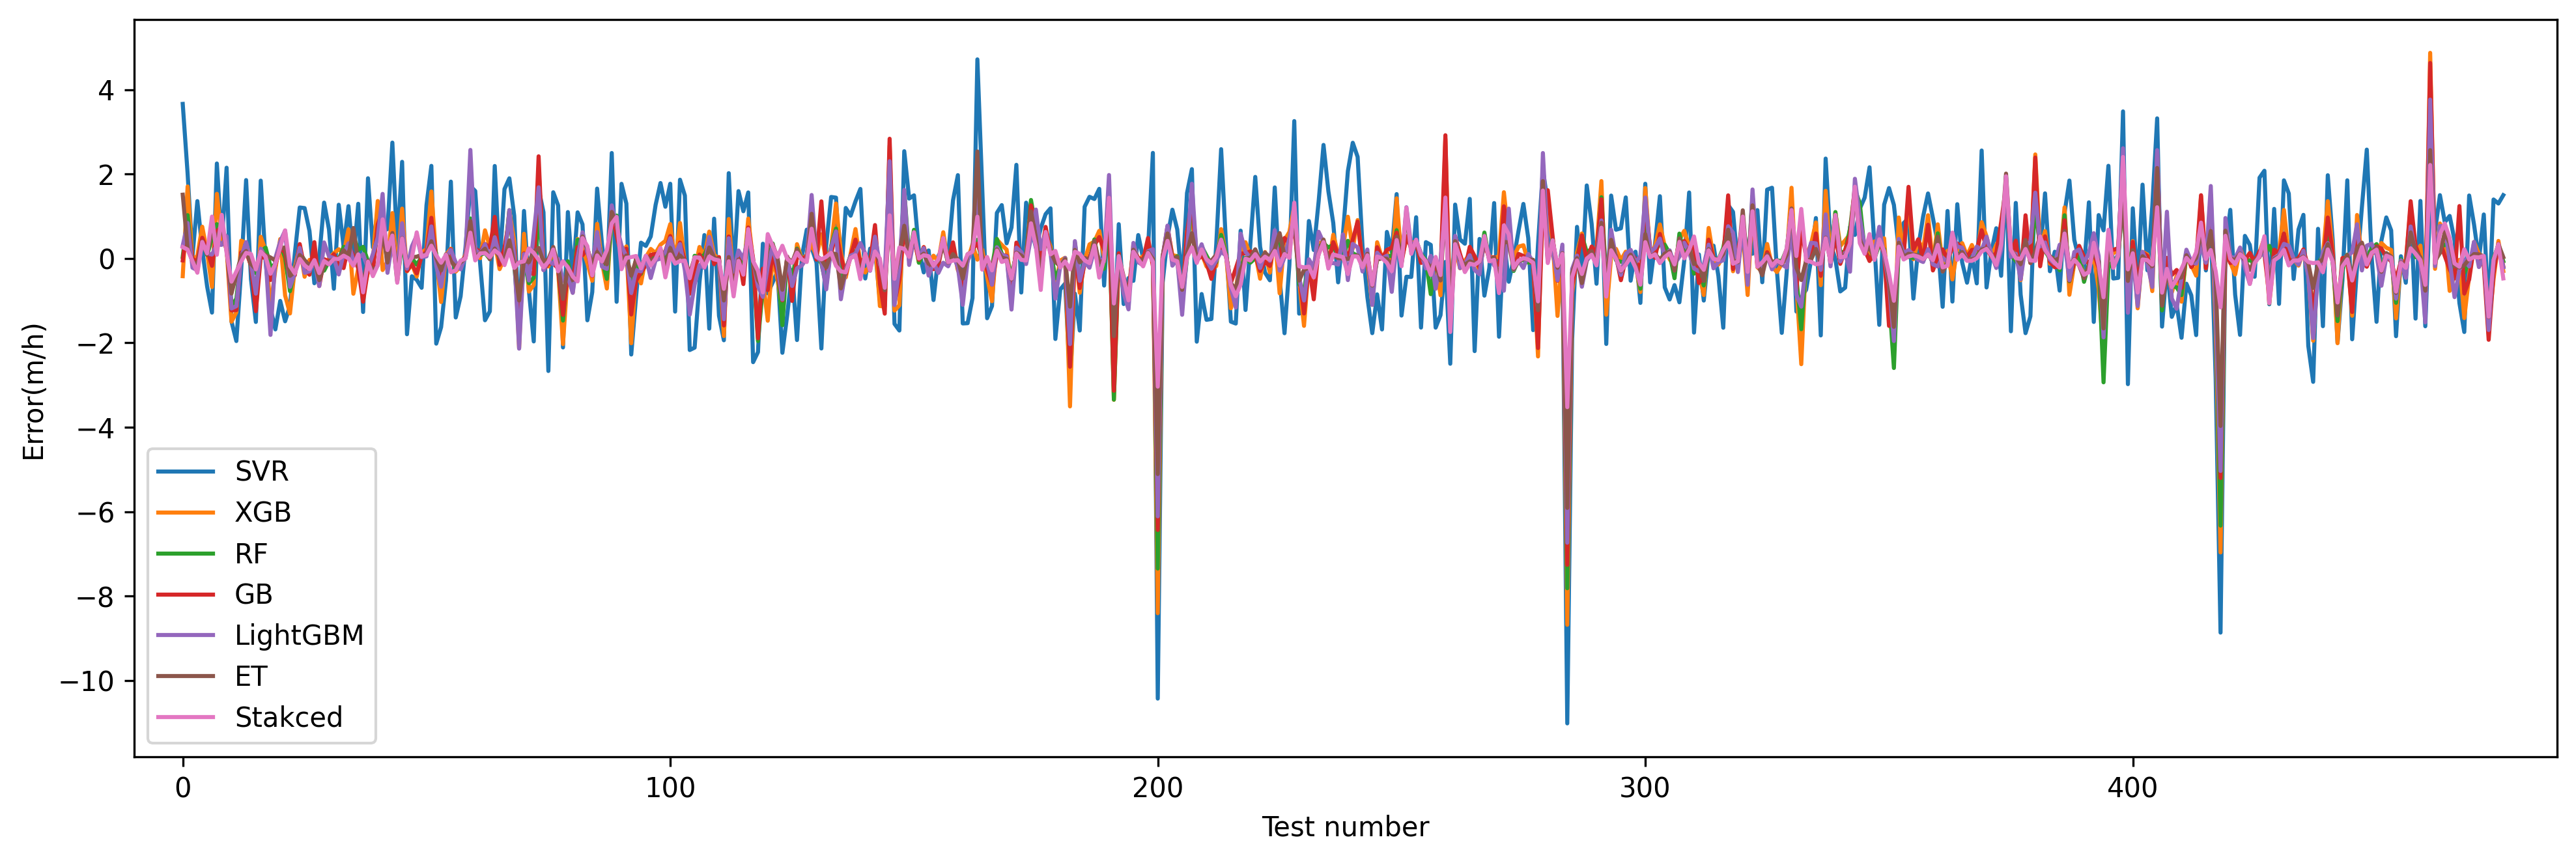

In [ ]:
fig1=plt.figure(figsize=(16,5),dpi=300)
# plt.style.use('ggplot')
# plt.style.use('default')
# plt.plot(y_test_i-y_test_i,label='Denosied ROP')
# cmap=colormap

plt.plot(y_test_pred_SVR_i-y_test_i,label='SVR',linestyle='-')
plt.plot(y_test_pred_XGB_i-y_test_i,label='XGB',linestyle='-')
plt.plot(y_test_pred_RF_i-y_test_i,label='RF',linestyle='-')
plt.plot(y_test_pred_GB_i-y_test_i,label='GB',linestyle='-')
plt.plot(y_test_pred_LightGBM_i-y_test_i,label='LightGBM',linestyle='-')
plt.plot(y_test_pred_ET_i-y_test_i,label='ET',linestyle='-')
plt.plot(y_test_pred_s_i-y_test_i,label='Stakced',linestyle='-')

plt.xlim(-10,487)
plt.xlabel('Test number')
plt.ylabel('Error(m/h)')
plt.legend()
plt.savefig('error.png', dpi=300,bbox_inches='tight')

In [ ]:
MAPE_SVR=np.mean(abs((y_test_i-y_test_pred_SVR_i)/y_test_i))*100
MAPE_RF=np.mean(abs((y_test_i-y_test_pred_RF_i)/y_test_i))*100
MAPE_LightGBM=np.mean(abs((y_test_i-y_test_pred_LightGBM_i)/y_test_i))*100
MAPE_GB=np.mean(abs((y_test_i-y_test_pred_GB_i)/y_test_i))*100
MAPE_XGB=np.mean(abs((y_test_i-y_test_pred_XGB_i)/y_test_i))*100
MAPE_s=np.mean(abs((y_test_i-y_test_pred_s_i)/y_test_i))*100
MAPE_ET=np.mean(abs((y_test_i-y_test_pred_ET_i)/y_test_i))*100

RMSE_SVR=mean_squared_error(y_test_i,y_test_pred_SVR_i)**0.5
RMSE_RF=mean_squared_error(y_test_i,y_test_pred_RF_i)**0.5
RMSE_LightGBM=mean_squared_error(y_test_i,y_test_pred_LightGBM_i)**0.5
RMSE_GB=mean_squared_error(y_test_i,y_test_pred_GB_i)**0.5
RMSE_XGB=mean_squared_error(y_test_i,y_test_pred_XGB_i)**0.5
RMSE_ET=mean_squared_error(y_test_i,y_test_pred_ET_i)**0.5
RMSE_s=mean_squared_error(y_test_i, y_test_pred_s_i)**0.5


R2_SVR=r2_score(y_test_i,y_test_pred_SVR_i)
R2_RF=r2_score(y_test_i,y_test_pred_RF_i)
R2_LightGBM=r2_score(y_test_i,y_test_pred_LightGBM_i)
R2_GB=r2_score(y_test_i,y_test_pred_GB_i)
R2_XGB=r2_score(y_test_i,y_test_pred_XGB_i)
R2_ET=r2_score(y_test_i,y_test_pred_ET_i)
R2_s=r2_score(y_test_i, y_test_pred_s_i)


RMSE_SVR_Train=mean_squared_error(y_train_i,y_train_pred_SVR_i)**0.5
RMSE_RF_Train=mean_squared_error(y_train_i,y_train_pred_RF_i)**0.5
RMSE_LightGBM_Train=mean_squared_error(y_train_i,y_train_pred_LightGBM_i)**0.5
RMSE_GB_Train=mean_squared_error(y_train_i,y_train_pred_GB_i)**0.5
RMSE_XGB_Train=mean_squared_error(y_train_i,y_train_pred_XGB_i)**0.5
RMSE_ET_Train=mean_squared_error(y_train_i,y_train_pred_ET_i)**0.5
RMSE_s_Train=mean_squared_error(y_train_i, y_train_pred_s_i)**0.5

R2_SVR_Train=r2_score(y_train_i,y_train_pred_SVR_i)
R2_RF_Train=r2_score(y_train_i,y_train_pred_RF_i)
R2_LightGBM_Train=r2_score(y_train_i,y_train_pred_LightGBM_i)
R2_GB_Train=r2_score(y_train_i,y_train_pred_GB_i)
R2_XGB_Train=r2_score(y_train_i,y_train_pred_XGB_i)
R2_ET_Train=r2_score(y_train_i,y_train_pred_ET_i)
R2_s_Train=r2_score(y_train_i, y_train_pred_s_i)

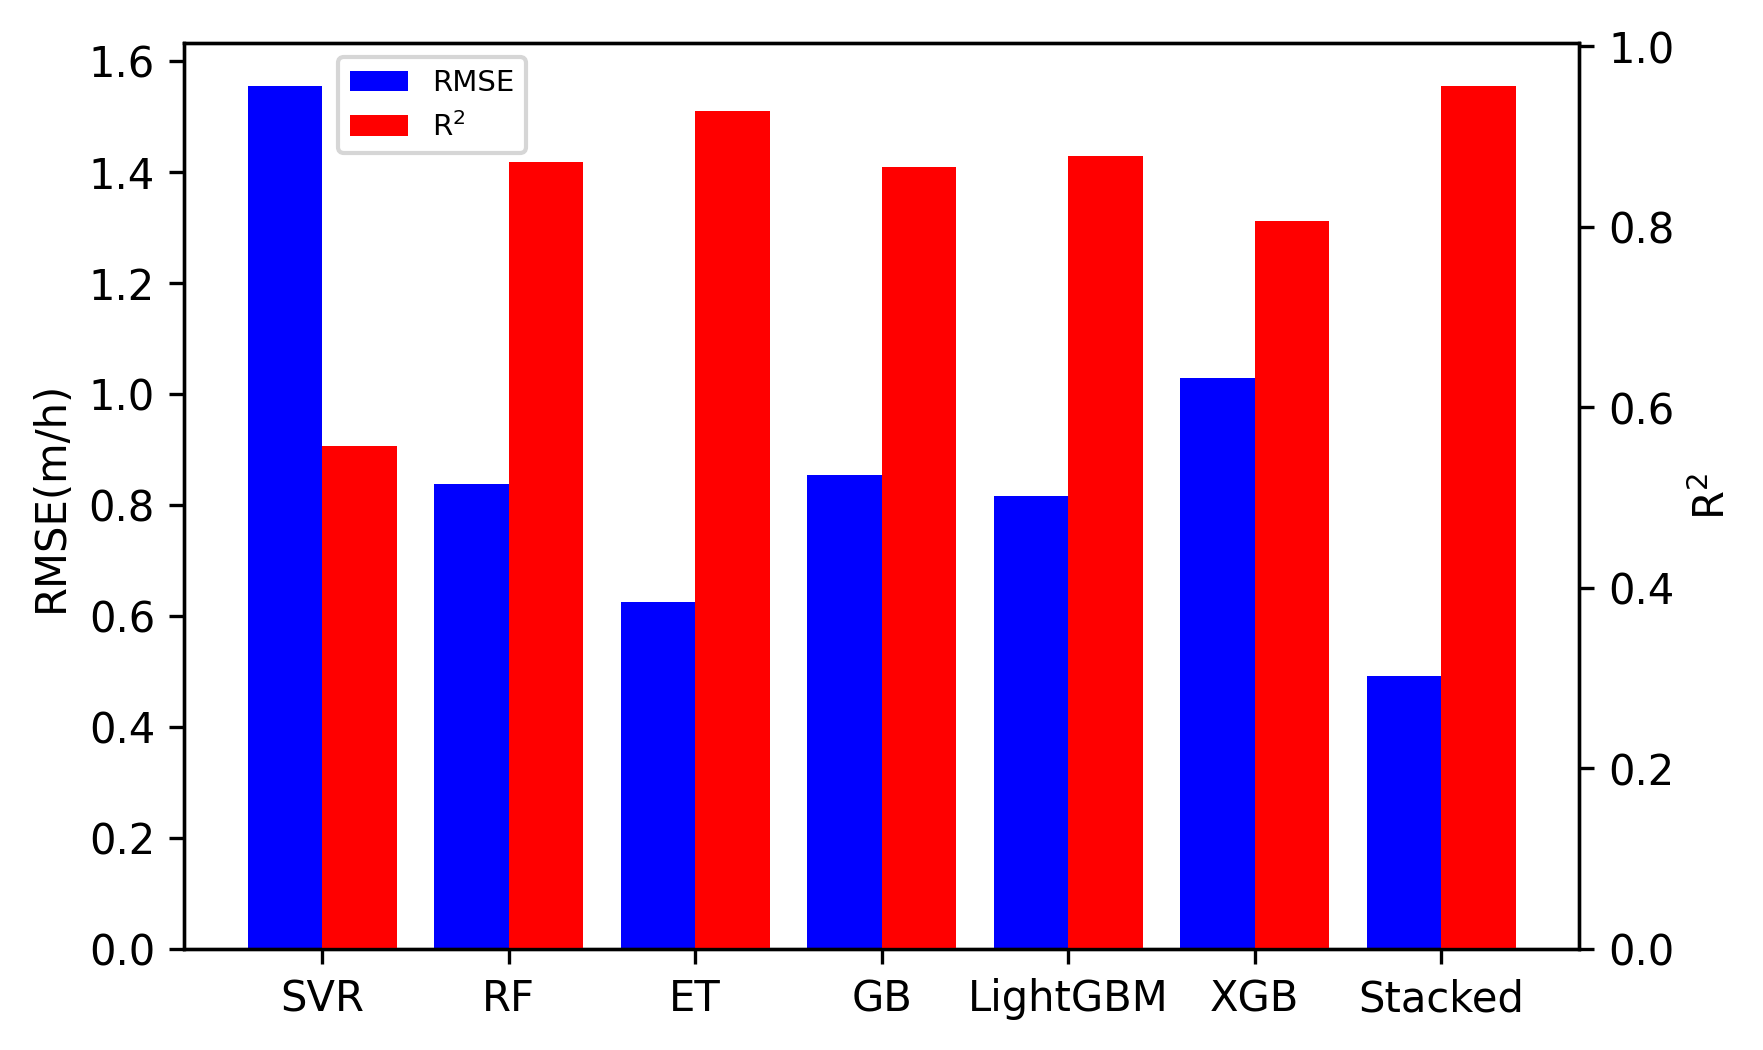

In [ ]:
fig, ax1 = plt.subplots(dpi=300)
l1=ax1.bar([i+1 for i in range(7)],[RMSE_SVR,RMSE_RF,RMSE_ET,RMSE_GB,RMSE_LightGBM,RMSE_XGB,RMSE_s],width=0.4,label='RMSE',color='blue')
ax1.set_ylabel(u"RMSE(m/h)")

ax2 = ax1.twinx()
l2=ax2.bar([i+1.4 for i in range(7)],[R2_SVR,R2_RF,R2_ET,R2_GB,R2_LightGBM,R2_XGB,R2_s],width=0.4,label='R$^2$',color='red')
ax2.set_ylabel("R$^2$")

plt.xticks([i+1.2 for i in range(7)],['SVR','RF','ET','GB','LightGBM','XGB','Stacked'])

plt.legend([l1, l2], ['RMSE', 'R$^2$'],fontsize=7,loc='upper left', bbox_to_anchor=(0.1,1))
plt.savefig('RMSE_R2.png', dpi=300,bbox_inches='tight')

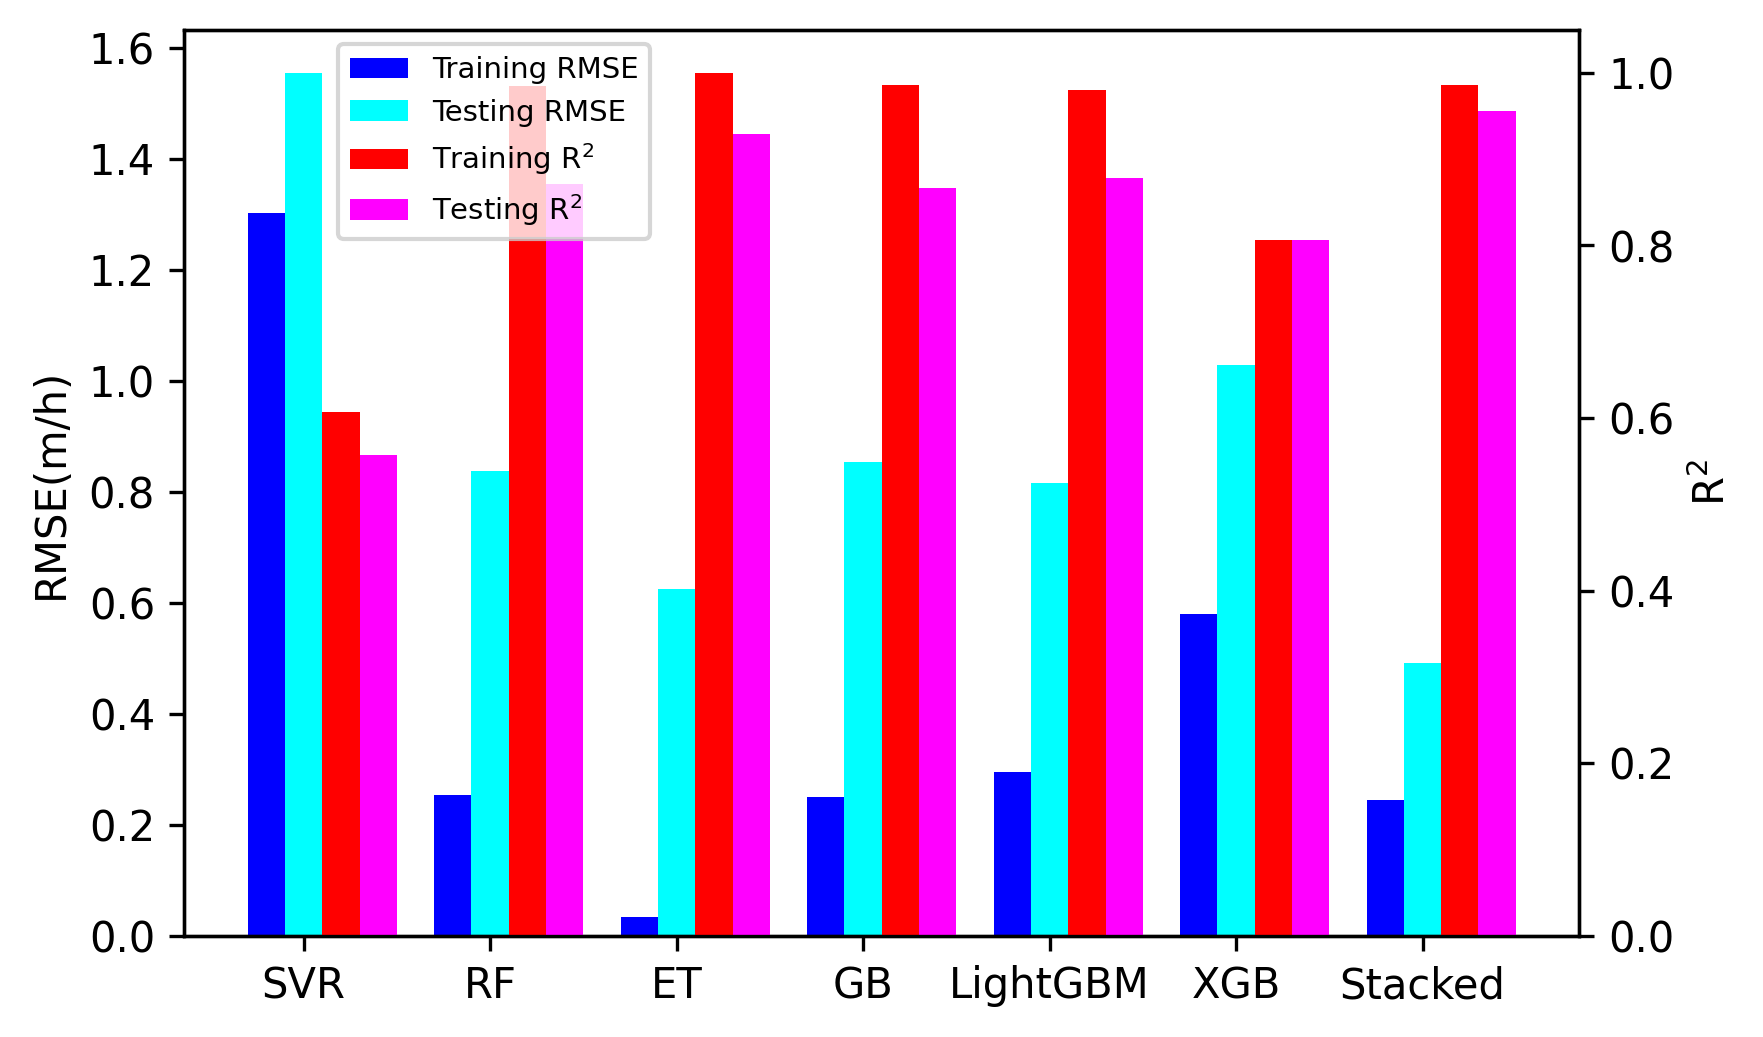

In [ ]:
fig, ax1 = plt.subplots(dpi=300)
l1=ax1.bar([i+1 for i in range(7)],
           [RMSE_SVR_Train,RMSE_RF_Train,RMSE_ET_Train,RMSE_GB_Train,RMSE_LightGBM_Train,RMSE_XGB_Train,RMSE_s_Train],width=0.2,label='RMSE',color='blue')
l2=ax1.bar([i+1.2 for i in range(7)],[RMSE_SVR,RMSE_RF,RMSE_ET,RMSE_GB,RMSE_LightGBM,RMSE_XGB,RMSE_s],width=0.2,label='RMSE',color='cyan')
ax1.set_ylabel(u"RMSE(m/h)")


ax2 = ax1.twinx()
l4=ax2.bar([i+1.6 for i in range(7)],[R2_SVR,R2_RF,R2_ET,R2_GB,R2_LightGBM,R2_XGB,R2_s],width=0.2,label='R$^2$',color='red')
l3=ax2.bar([i+1.4 for i in range(7)],
           [R2_SVR_Train,R2_RF_Train,R2_ET_Train,R2_GB_Train,R2_LightGBM_Train,R2_XGB,R2_s_Train],width=0.2,label='R$^2$',color='red')
l4=ax2.bar([i+1.6 for i in range(7)],[R2_SVR,R2_RF,R2_ET,R2_GB,R2_LightGBM,R2_XGB,R2_s],width=0.2,label='R$^2$',color='magenta')
ax2.set_ylabel("R$^2$")

plt.xticks([i+1.2 for i in range(7)],['SVR','RF','ET','GB','LightGBM','XGB','Stacked'])
plt.legend([l1, l2,l3,l4], ['Training RMSE','Testing RMSE','Training R$^2$', 'Testing R$^2$'],fontsize=7,loc='upper left', bbox_to_anchor=(0.1,1))
plt.savefig('RMSE_R2.png', dpi=300,bbox_inches='tight')

In [ ]:
class PSO(object):
    def __init__(self,particle_num,particle_dim,iter_num,c1,c2,w,max_value,min_value,trainX_initial):
        '''参数初始化
        particle_num(int):粒子群的粒子数量
        particle_dim(int):粒子维度，对应待寻优参数的个数
        iter_num(int):最大迭代次数
        c1(float):局部学习因子，表示粒子移动到该粒子历史最优位置(pbest)的加速项的权重
        c2(float):全局学习因子，表示粒子移动到所有粒子最优位置(gbest)的加速项的权重
        w(float):惯性因子，表示粒子之前运动方向在本次方向上的惯性
        max_value(float):参数的最大值
        min_value(float):参数的最小值
        '''
        self.particle_num = particle_num
        self.particle_dim = particle_dim
        self.iter_num = iter_num
        self.c1 = c1  ##通常设为2.0
        self.c2 = c2  ##通常设为2.0
        self.w = w    
        self.max_value = max_value
        self.min_value = min_value
        self.trainX_initial=trainX_initial.copy(deep=True)
    
        
    def RPM_select(self,rpm_pso):
      #寻找最相近的RPM 
 

      for i in range(len(RPM)):
        select = 1
        if (abs(RPM[i]-rpm_pso) < select):
          
          select = RPM[i]
        
        # select = min(select, abs(select2))
        # print(select)
        
      return select

            
### 2.1 粒子群初始化
    def swarm_origin(self):
        '''粒子群初始化
        input:self(object):PSO类
        output:particle_loc(list):粒子群位置列表
               particle_dir(list):粒子群方向列表
        '''
        particle_loc = []
        particle_dir = []
        for i in range(self.particle_num):
            tmp1 = []
            tmp2 = []
            for j in range(self.particle_dim):
                a = random.random()
                b = random.random()
                tmp1.append(a * (self.max_value - self.min_value) + self.min_value)
                tmp2.append(b)
                # print(tmp1)
            rpm_pso=tmp1[1]
            tmp1[1]=self.RPM_select(rpm_pso)
            particle_loc.append(tmp1)
            particle_dir.append(tmp2)
            
        #把第一个粒子设置为初始值
        trainX_pso=self.trainX_initial.values.reshape(1, -1)
        particle_loc[0][0]=trainX_pso[0][1]
        # particle_loc[0][1]=trainX_pso[0][2]
        particle_loc[0][1]=trainX_pso[0][3]#RPM 
        particle_loc[0][2]=trainX_pso[0][6]
        particle_loc[0][3]=trainX_pso[0][10]        
        return particle_loc,particle_dir

## 2.2 计算适应度函数数值列表;初始化pbest_parameters和gbest_parameter   
    def fitness(self,particle_loc):
        '''计算适应度函数值
        input:self(object):PSO类
              particle_loc(list):粒子群位置列表
        output:fitness_value(list):适应度函数值列表
        '''
        fitness_value = []
        ### 1.预测值
        # for i in range(self.particle_num):
        #     rbf_svm = svm.SVC(kernel = 'rbf', C = particle_loc[i][0], gamma = particle_loc[i][1])
        #     cv_scores = cross_validation.cross_val_score(rbf_svm,trainX,trainY,cv =3,scoring = 'accuracy')
        #     fitness_value.append(cv_scores.mean())
        for i in range(self.particle_num):
          trainX_pso=self.trainX_initial.values.reshape(1, -1)
          trainX_pso[0][1]=particle_loc[i][0]
          # trainX_pso[0][2]=particle_loc[i][1]
          trainX_pso[0][3]=particle_loc[i][1]#RPM
          trainX_pso[0][6]=particle_loc[i][2]
          trainX_pso[0][10]=particle_loc[i][3]

          y_pred_pso=stacked.predict(trainX_pso)
          fitness_value.append(y_pred_pso)

        ### 2. 当前粒子群最优适应度函数值和对应的参数
        current_fitness = 0.0
        current_parameter = []
        for i in range(self.particle_num):
            if current_fitness < fitness_value[i]:
                current_fitness = fitness_value[i]
                current_parameter = particle_loc[i]

        return fitness_value,current_fitness,current_parameter 
        

## 2.3  粒子位置更新 
    def updata(self,particle_loc,particle_dir,gbest_parameter,pbest_parameters):
        '''粒子群位置更新
        input:self(object):PSO类
              particle_loc(list):粒子群位置列表
              particle_dir(list):粒子群方向列表
              gbest_parameter(list):全局最优参数
              pbest_parameters(list):每个粒子的历史最优值
        output:particle_loc(list):新的粒子群位置列表
               particle_dir(list):新的粒子群方向列表
        '''
        ## 1.计算新的量子群方向和粒子群位置
        for i in range(self.particle_num): 
            a1 = [x * self.w for x in particle_dir[i]]
            a2 = [y * self.c1 * random.random() for y in list(np.array(pbest_parameters[i]) - np.array(particle_loc[i]))]
            a3 = [z * self.c2 * random.random() for z in list(np.array(gbest_parameter) - np.array(particle_dir[i]))]
            particle_dir[i] = list(np.array(a1) + np.array(a2) + np.array(a3))
         
            # particle_dir[i] = self.w * particle_dir[i] + self.c1 * random.random() * (pbest_parameters[i] - particle_loc[i]) + self.c2 * random.random() * (gbest_parameter - particle_dir[i])
            
            
            particle_loc[i] = list(np.array(particle_loc[i]) + np.array(particle_dir[i]))
            
        ## 2.将更新后的量子位置参数固定在[min_value,max_value]内 
        ### 2.1 每个参数的取值列表
        parameter_list = []
        for i in range(self.particle_dim):
            tmp1 = []
            for j in range(self.particle_num):
                tmp1.append(particle_loc[j][i])
            parameter_list.append(tmp1)
        ### 2.2 每个参数取值的最大值、最小值、平均值   
        value = []
        for i in range(self.particle_dim):
            tmp2 = []
            tmp2.append(max(parameter_list[i]))
            tmp2.append(min(parameter_list[i]))
            value.append(tmp2)
        
        for i in range(self.particle_num):
            for j in range(self.particle_dim):
                particle_loc[i][j] = (particle_loc[i][j] - value[j][1])/(value[j][0] - value[j][1]) * (self.max_value - self.min_value) + self.min_value
                rpm_pso=particle_loc[i][1]
                particle_loc[i][1]=self.RPM_select(rpm_pso)
        return particle_loc,particle_dir

## 2.4 画出适应度函数值变化图
    def plot(self,results):
        '''画图
        '''
        X = []
        Y = []
        for i in range(self.iter_num):
            X.append(i + 1)
            Y.append(results[i])
        plt.plot(X,Y)
        plt.xlabel('Number of iteration',size = 15)
        plt.ylabel('Value of ROP',size = 15)
        plt.title('PSO_ROP parameter optimization')
        plt.show() 
        
## 2.5 主函数        
    def main(self):
        '''主函数
        '''
        results = []
        best_fitness = 0.0 
        ## 1、粒子群初始化
        particle_loc,particle_dir = self.swarm_origin()
        ## 2、初始化gbest_parameter、pbest_parameters、fitness_value列表
        ### 2.1 gbest_parameter
        gbest_parameter = []
        for i in range(self.particle_dim):
            gbest_parameter.append(0.0)
        ### 2.2 pbest_parameters
        pbest_parameters = []
        for i in range(self.particle_num):
            tmp1 = []
            for j in range(self.particle_dim):
                tmp1.append(0.0)
            pbest_parameters.append(tmp1)
        ### 2.3 fitness_value
        fitness_value = []
        for i in range(self.particle_num):
            fitness_value.append(0.0)
    
        ## 3.迭代
        for i in range(self.iter_num):
            ### 3.1 计算当前适应度函数值列表
            current_fitness_value,current_best_fitness,current_best_parameter = self.fitness(particle_loc)
            ### 3.2 求当前的gbest_parameter、pbest_parameters和best_fitness
            for j in range(self.particle_num):
                if current_fitness_value[j] > fitness_value[j]:
                    pbest_parameters[j] = particle_loc[j]
            if current_best_fitness > best_fitness:
                best_fitness = current_best_fitness
                gbest_parameter = current_best_parameter
            
            # print('iteration is :',i+1,';Best parameters:',gbest_parameter,';Best fitness',best_fitness)
            results.append(best_fitness)
            ### 3.3 更新fitness_value
            fitness_value = current_fitness_value
            ### 3.4 更新粒子群
            particle_loc,particle_dir = self.updata(particle_loc,particle_dir,gbest_parameter,pbest_parameters)
        ## 4.结果展示
        results.sort()
        self.plot(results)
        print('Final parameters are :',gbest_parameter)
        return gbest_parameter,best_fitness
pso_depth=[i*100+100 for i in range(23)]
pso_parameter=[]
pso_rop=[]
RPM=np.array([30,40,60,80,120])
RPM=MinMaxScaler().fit_transform(RPM.reshape(-1, 1))
RPM=RPM.reshape(5)
for j in pso_depth:
  trainX_initial=X.loc[j]
  particle_num = 20
  particle_dim = 4
  iter_num = 50
  c1 = 2
  c2 = 2
  w = 0.9
  max_value = 1
  min_value = 0.001
  print('No.',j)
  pso = PSO(particle_num,particle_dim,iter_num,c1,c2,w,max_value,min_value,trainX_initial)
  gbest_parameter,best_fitness=pso.main()
  pso_parameter.append(gbest_parameter)
  pso_rop.append(best_fitness)